<a href="https://colab.research.google.com/github/stormKx18/08MBID---Visualizacion-de-Datos/blob/main/Trabajo_pr%C3%A1ctico_2daConvocatoria_Christian_Jaime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
data = pd.read_csv('Netflix Userbase.csv')
data[0:5]

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


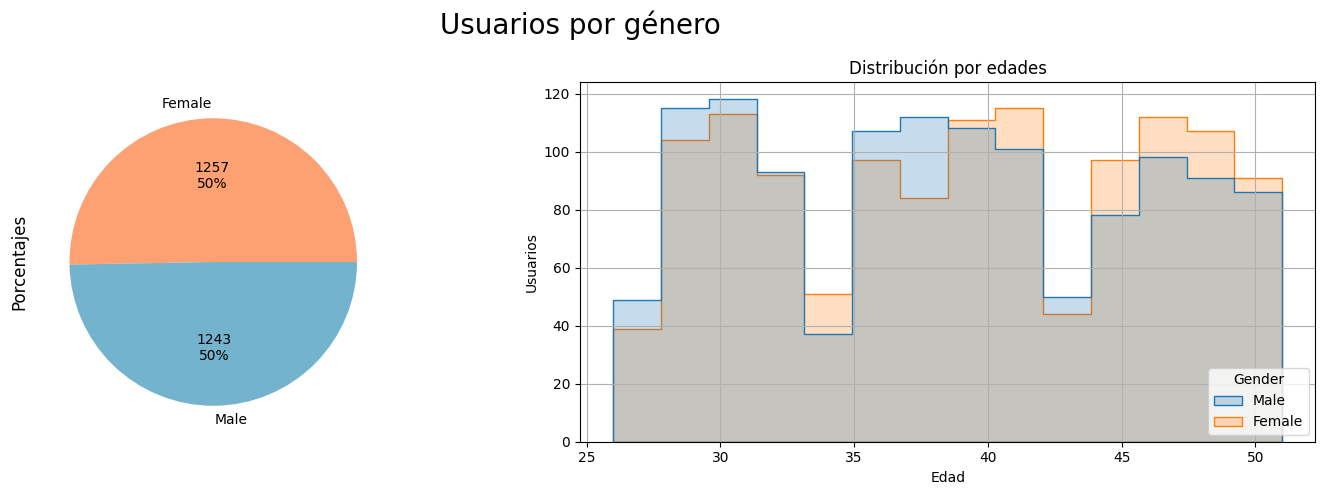

In [3]:


fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Usuarios por género', fontsize=20)

def percent(val):
    return f'{val / 100 * len(data):.0f}\n{val:.0f}%'

data.groupby('Gender').size().plot(kind='pie', autopct=percent, textprops={'fontsize': 10},
                                   colors=['#fda172', '#74b3ce'], ax=axes[0])
axes[0].set_ylabel('Porcentajes', size=12)
g = sns.histplot(ax=axes[1], data=data, x="Age", hue="Gender", element="step")
g.set(title='Distribución por edades')
sns.move_legend(g, "lower right")
axes[1].set(xlabel='Edad',ylabel='Usuarios')
plt.tight_layout()
plt.grid()
plt.show()



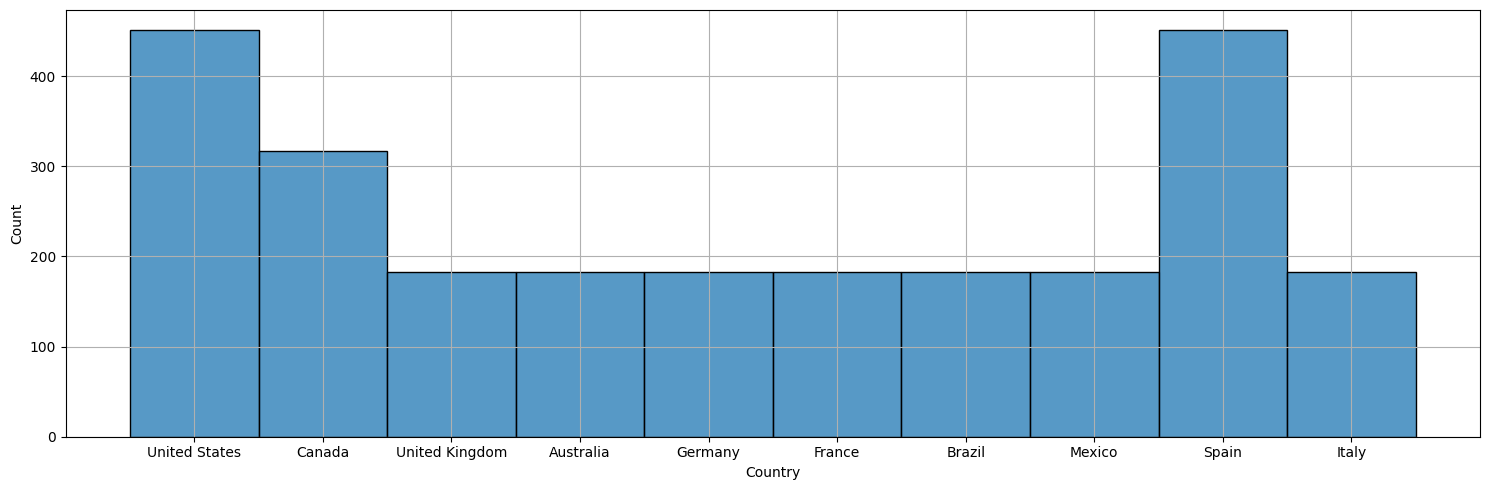

In [4]:
fig, axes = plt.subplots(1, figsize=(15, 5))
sns.histplot(data=data,x="Country")
plt.tight_layout()
plt.grid()
plt.show()

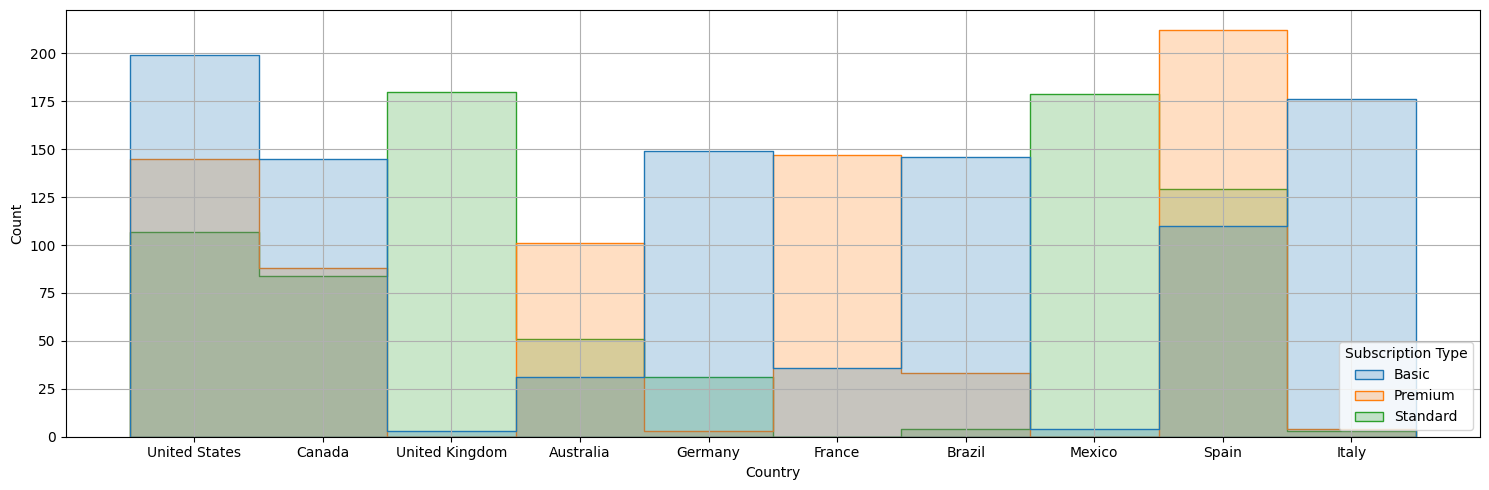

In [5]:
fig, axes = plt.subplots(1, figsize=(15, 5))
g = sns.histplot(data=data,x="Country", hue="Subscription Type", element="step")
sns.move_legend(g, "lower right")
plt.tight_layout()
plt.grid()
plt.show()

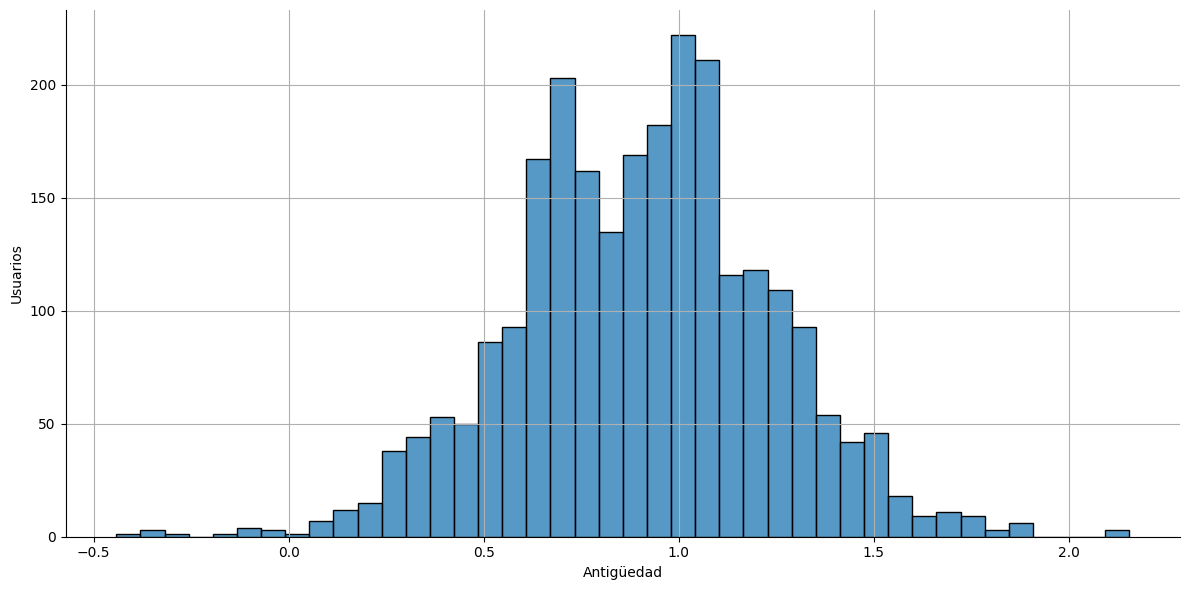

In [6]:
data['Last Payment Date'] = pd.to_datetime(data['Last Payment Date'])
data['Join Date'] = pd.to_datetime(data['Join Date'])

data['Antiguedad'] = ((data['Last Payment Date'] - data['Join Date']).dt.days)/30/12

g = sns.displot(data=data, x="Antiguedad", height=6, aspect=2,)
g.set_axis_labels("Antigüedad","Usuarios")
plt.grid()
plt.show()

In [7]:
df = data[['Antiguedad','Age','Device']].copy()

df = df.replace(to_replace="Tablet",value=1)
df = df.replace(to_replace="Smartphone",value=2)
df = df.replace(to_replace="Smart TV",value=3)
df = df.replace(to_replace="Laptop",value=4)


fig = px.parallel_coordinates(df, color="Device",labels={"Country": "Country",
                "Age": "Age", "Antiguedad": "Antiguedad",
                "Monthly Revenue": "Monthly Revenue", })
fig.show()